In [1]:
from qubecalib import QubeCalib

qc = QubeCalib("jb07scq_example_setup.json")
# もし装置の状態を復元したければ以下のコードを実行する
# qc.load_all_box_configs("jb07scq_example_box.json")
# qc.apply_all_box_configs()

In [13]:
box = qc.create_box("riken_1-08", reconnect=False)
if not all([_ for _ in box.link_status().values()]):
    box.relinkup(use_204b=False, background_noise_threshold=400)
box.reconnect()

{0: True, 1: True}

In [2]:
box.config_port(port=5,vatt=0x800)

In [8]:
qc.system_config_database._target_settings["RQ00"]["frequency"] = 10_000_000_000
qc.system_config_database._target_settings["RQ01"]["frequency"] = 10_020_000_000
qc.system_config_database._target_settings["RQ02"]["frequency"] = 10_040_000_000
qc.system_config_database._target_settings["RQ03"]["frequency"] = 10_060_000_000

0it [00:00, ?it/s]the capture unit 10.1.0.26:(<CaptureModule.U3: 3>, 0) captured 3840 samples, should be 960 samples
the capture unit 10.1.0.26:(<CaptureModule.U2: 2>, 0) captured 3840 samples, should be 960 samples


RQ04


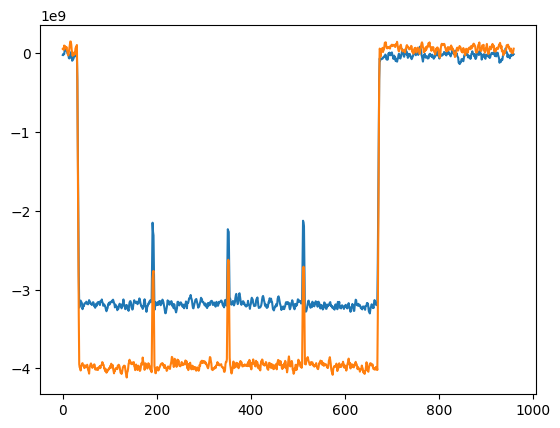

RQ05


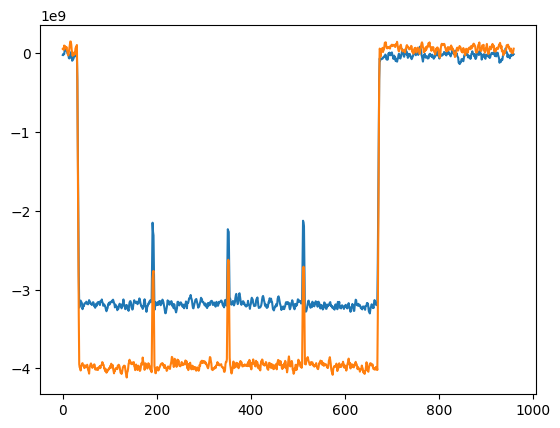

RQ06


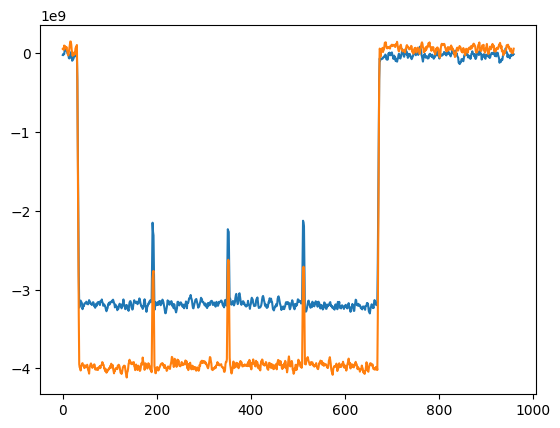

RQ07


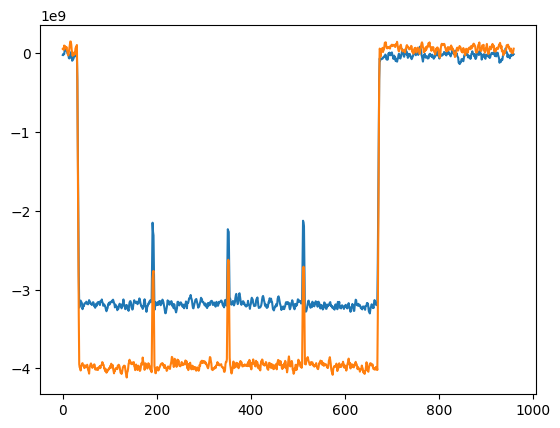

RQ00


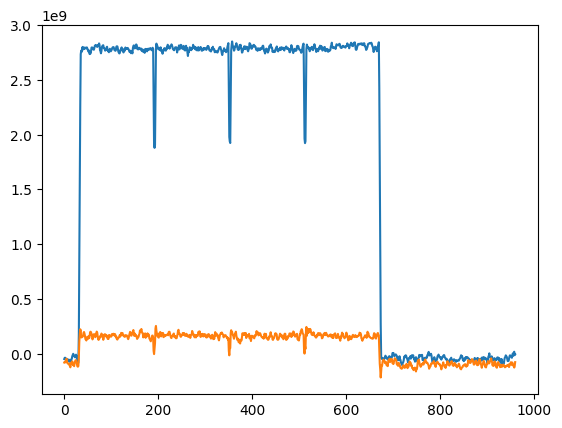

RQ01


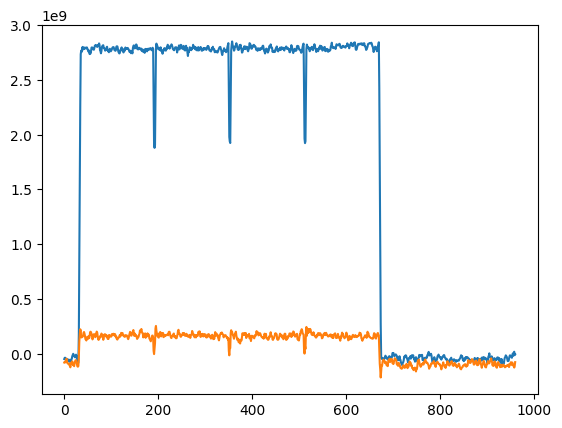

RQ02


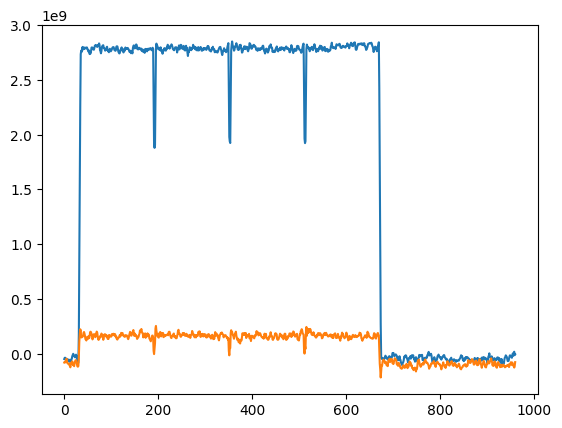

RQ03


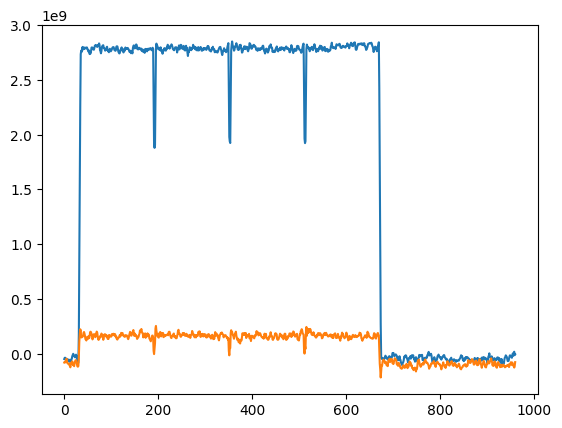

MUX01


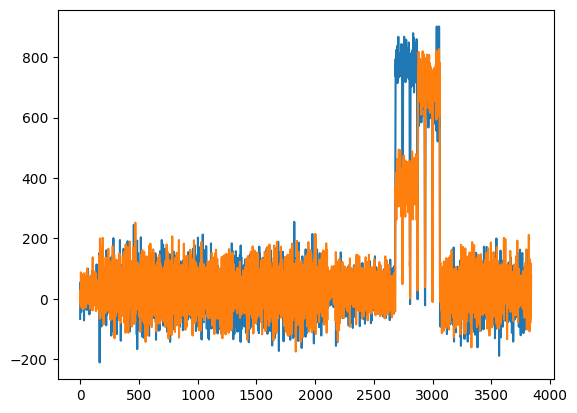

MUX00


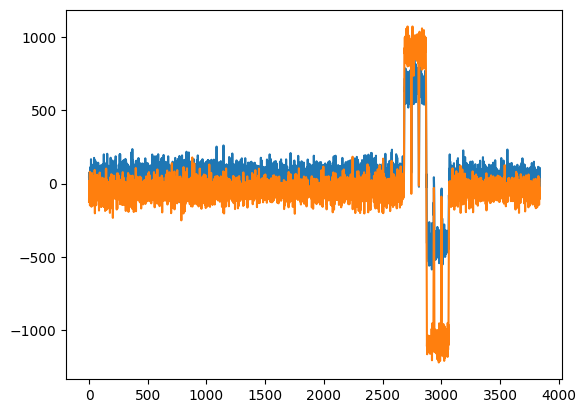

1it [00:01,  1.23s/it]

{'RQ04': <CaptureReturnCode.SUCCESS: 4>, 'RQ05': <CaptureReturnCode.SUCCESS: 4>, 'RQ06': <CaptureReturnCode.SUCCESS: 4>, 'RQ07': <CaptureReturnCode.SUCCESS: 4>, 'RQ00': <CaptureReturnCode.SUCCESS: 4>, 'RQ01': <CaptureReturnCode.SUCCESS: 4>, 'RQ02': <CaptureReturnCode.SUCCESS: 4>, 'RQ03': <CaptureReturnCode.SUCCESS: 4>, 'MUX01': <CaptureReturnCode.BROKEN_DATA: 3>, 'MUX00': <CaptureReturnCode.BROKEN_DATA: 3>}


the capture unit 10.1.0.26:(<CaptureModule.U3: 3>, 0) captured 3840 samples, should be 960 samples
the capture unit 10.1.0.26:(<CaptureModule.U2: 2>, 0) captured 3840 samples, should be 960 samples


RQ04


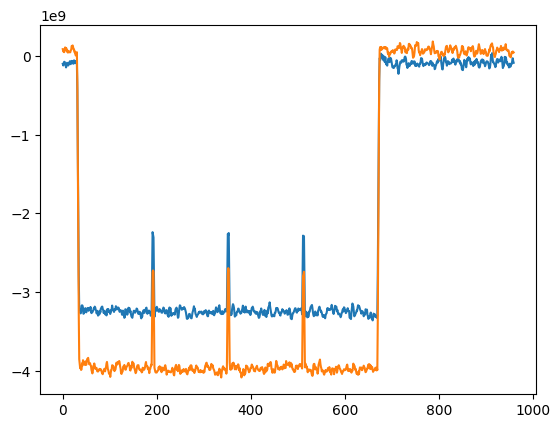

RQ05


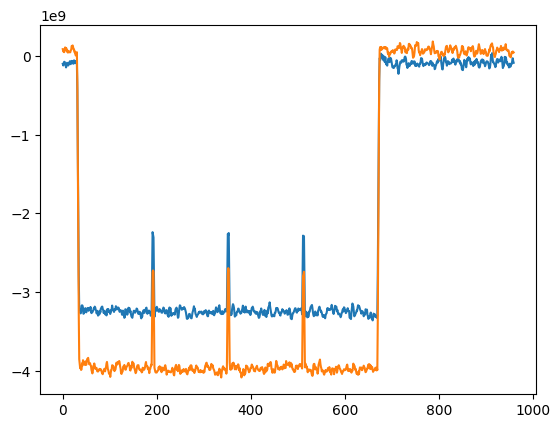

RQ06


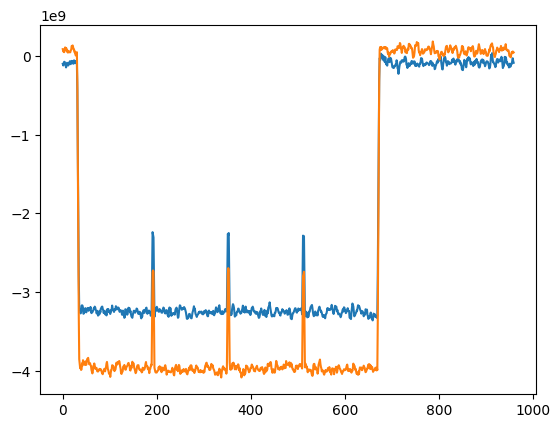

RQ07


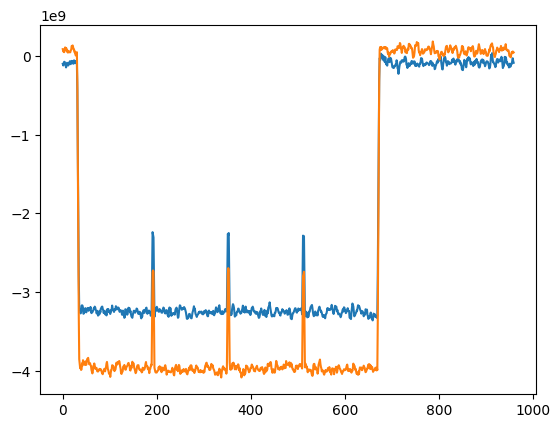

RQ00


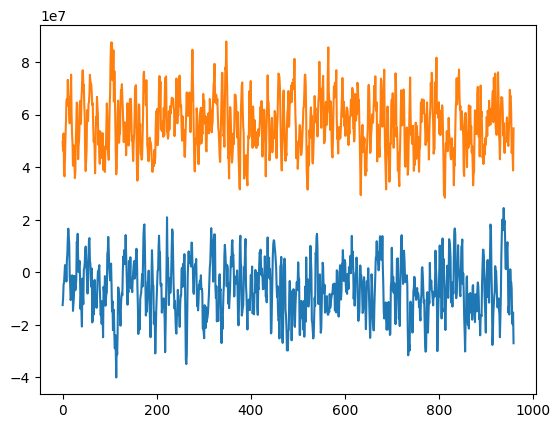

RQ01


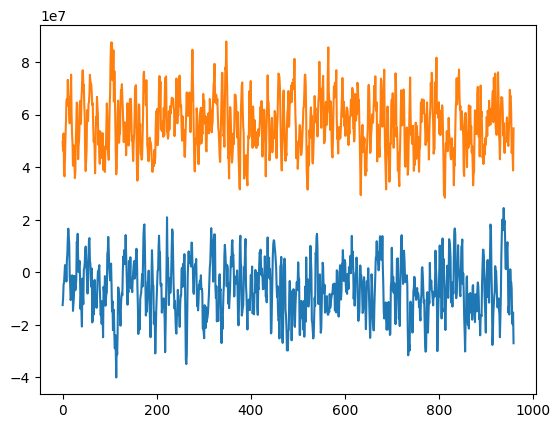

RQ02


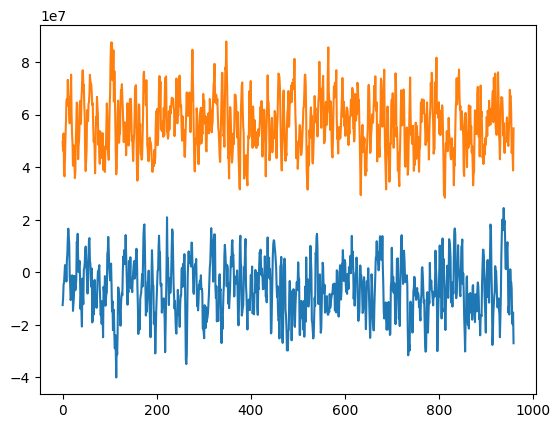

RQ03


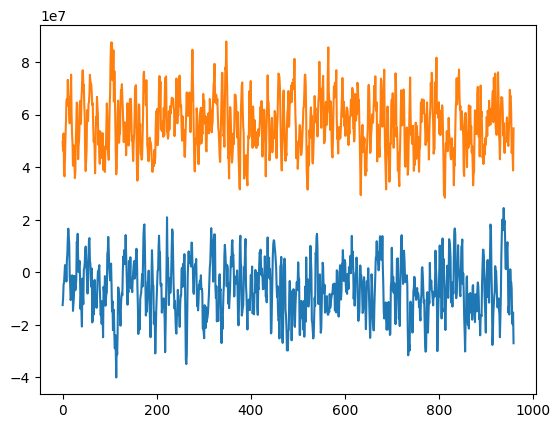

MUX01


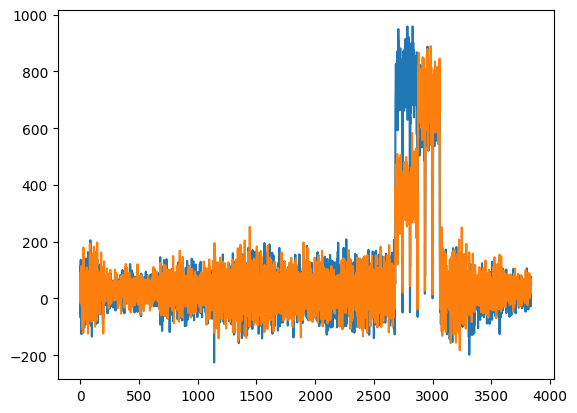

MUX00


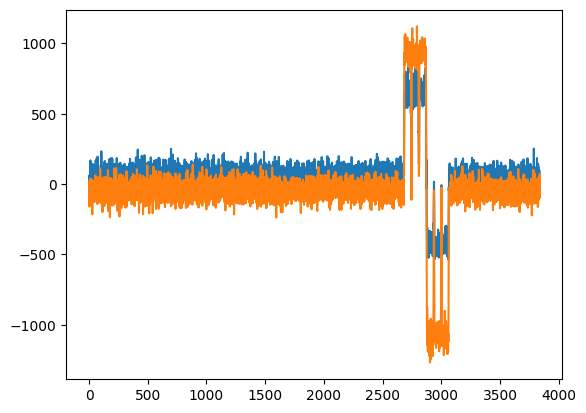

2it [00:02,  1.32s/it]

{'RQ04': <CaptureReturnCode.SUCCESS: 4>, 'RQ05': <CaptureReturnCode.SUCCESS: 4>, 'RQ06': <CaptureReturnCode.SUCCESS: 4>, 'RQ07': <CaptureReturnCode.SUCCESS: 4>, 'RQ00': <CaptureReturnCode.SUCCESS: 4>, 'RQ01': <CaptureReturnCode.SUCCESS: 4>, 'RQ02': <CaptureReturnCode.SUCCESS: 4>, 'RQ03': <CaptureReturnCode.SUCCESS: 4>, 'MUX01': <CaptureReturnCode.BROKEN_DATA: 3>, 'MUX00': <CaptureReturnCode.BROKEN_DATA: 3>}


the capture unit 10.1.0.26:(<CaptureModule.U3: 3>, 0) captured 3840 samples, should be 960 samples
the capture unit 10.1.0.26:(<CaptureModule.U2: 2>, 0) captured 3840 samples, should be 960 samples


RQ04


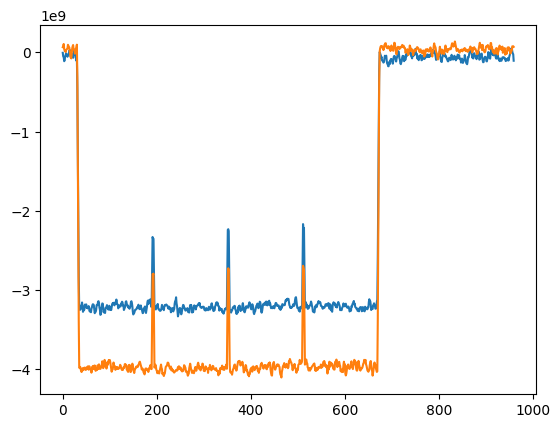

RQ05


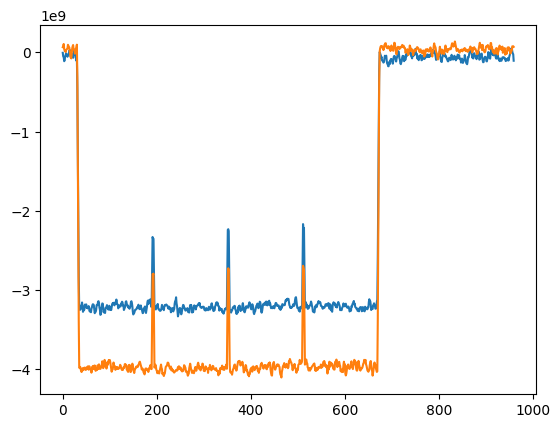

RQ06


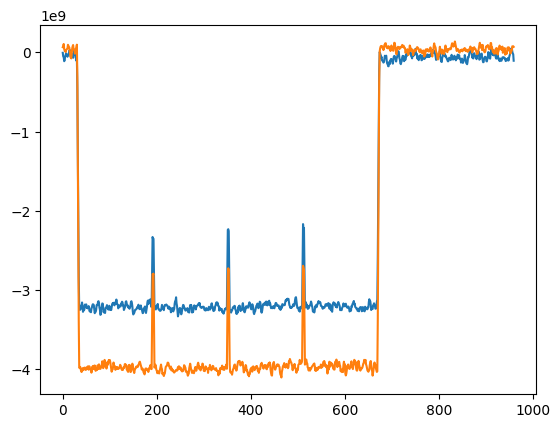

RQ07


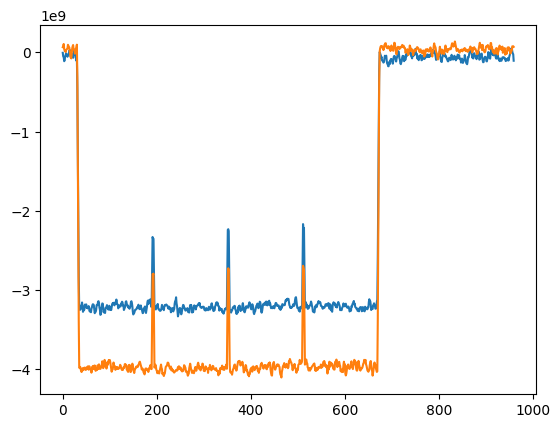

RQ00


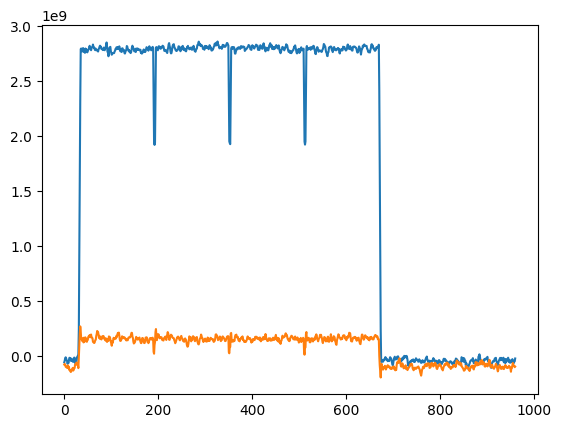

RQ01


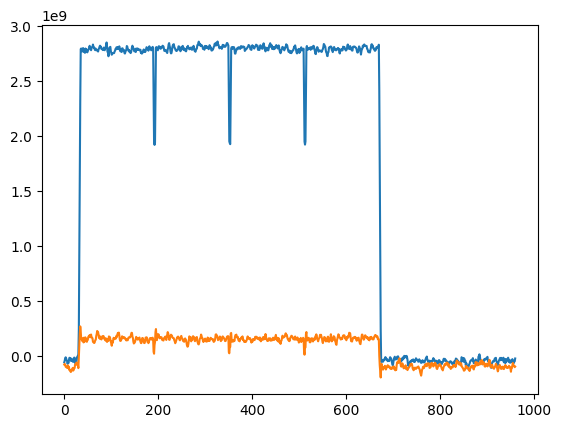

RQ02


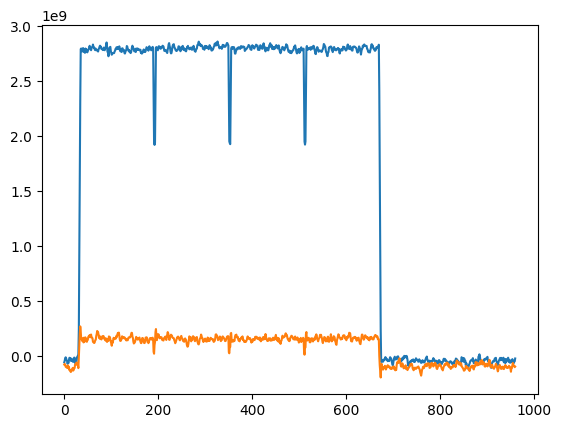

RQ03


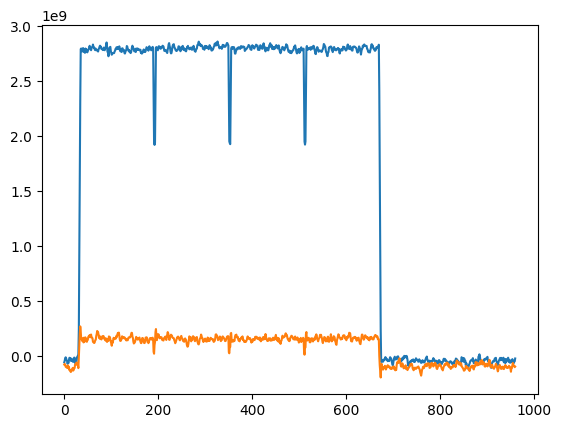

MUX01


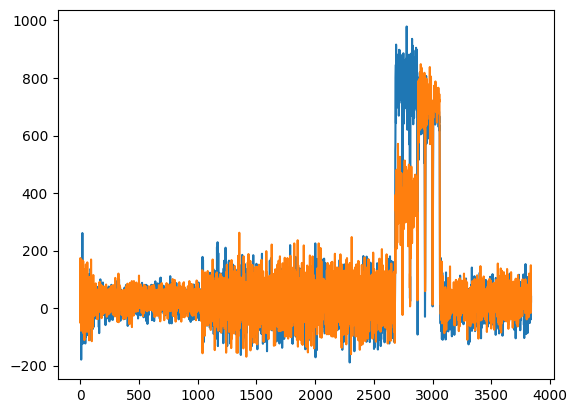

MUX00


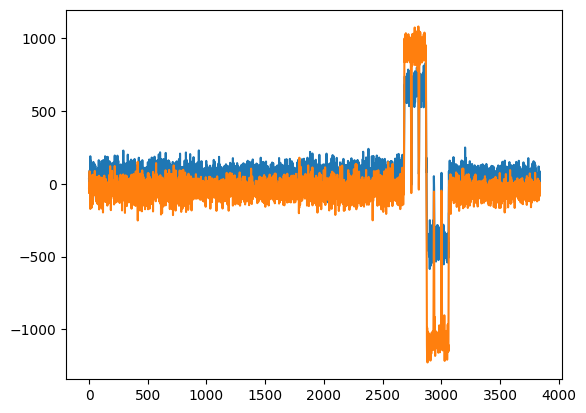

3it [00:03,  1.33s/it]

{'RQ04': <CaptureReturnCode.SUCCESS: 4>, 'RQ05': <CaptureReturnCode.SUCCESS: 4>, 'RQ06': <CaptureReturnCode.SUCCESS: 4>, 'RQ07': <CaptureReturnCode.SUCCESS: 4>, 'RQ00': <CaptureReturnCode.SUCCESS: 4>, 'RQ01': <CaptureReturnCode.SUCCESS: 4>, 'RQ02': <CaptureReturnCode.SUCCESS: 4>, 'RQ03': <CaptureReturnCode.SUCCESS: 4>, 'MUX01': <CaptureReturnCode.BROKEN_DATA: 3>, 'MUX00': <CaptureReturnCode.BROKEN_DATA: 3>}


In [3]:
# from qubecalib.units import Units as U
from qubecalib.neopulse import Sequence, Blank, Flushleft, RaisedCosFlatTop, Capture, Series
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with Sequence() as seq:
    Blank(duration=128e-9)
    with Flushleft():
        with Series():
            RaisedCosFlatTop(duration=10*128e-9, amplitude=0.01, rise_time=10e-9).set_target("RQ00")
            RaisedCosFlatTop(duration=10*128e-9, amplitude=0.01, rise_time=10e-9).set_target("RQ01")
            RaisedCosFlatTop(duration=10*128e-9, amplitude=0.01, rise_time=10e-9).set_target("RQ02")
            RaisedCosFlatTop(duration=10*128e-9, amplitude=0.01, rise_time=10e-9).set_target("RQ03")
        Capture(duration=60*128e-9).set_target("RQ00")
        Capture(duration=60*128e-9).set_target("RQ01")
        Capture(duration=60*128e-9).set_target("RQ02")
        Capture(duration=60*128e-9).set_target("RQ03")
        with Series():
            RaisedCosFlatTop(duration=10*128e-9, amplitude=0.01, rise_time=10e-9).set_target("RQ04")
            RaisedCosFlatTop(duration=10*128e-9, amplitude=0.01, rise_time=10e-9).set_target("RQ05")
            RaisedCosFlatTop(duration=10*128e-9, amplitude=0.01, rise_time=10e-9).set_target("RQ06")
            RaisedCosFlatTop(duration=10*128e-9, amplitude=0.01, rise_time=10e-9).set_target("RQ07")
        Capture(duration=60*128e-9).set_target("RQ04")
        Capture(duration=60*128e-9).set_target("RQ05")
        Capture(duration=60*128e-9).set_target("RQ06")
        Capture(duration=60*128e-9).set_target("RQ07")
        with Series():
            Blank(duration=40*128e-9)
            RaisedCosFlatTop(duration=128e-9, amplitude=1.0, rise_time=10e-9).set_target("CQ00_0")
            RaisedCosFlatTop(duration=128e-9, amplitude=1.0, rise_time=10e-9).set_target("CQ00_1")
            RaisedCosFlatTop(duration=128e-9, amplitude=1.0, rise_time=10e-9).set_target("CQ00_2")
            RaisedCosFlatTop(duration=128e-9, amplitude=1.0, rise_time=10e-9).set_target("CQ01_0")
            RaisedCosFlatTop(duration=128e-9, amplitude=1.0, rise_time=10e-9).set_target("CQ01_1")
            RaisedCosFlatTop(duration=128e-9, amplitude=1.0, rise_time=10e-9).set_target("CQ01_2")
        Capture(duration=60*128e-9).set_target("MUX00")
        with Series():
            Blank(duration=40*128e-9)
            RaisedCosFlatTop(duration=128e-9, amplitude=1.0, rise_time=10e-9).set_target("CQ04_0")
            RaisedCosFlatTop(duration=128e-9, amplitude=1.0, rise_time=10e-9).set_target("CQ04_1")
            RaisedCosFlatTop(duration=128e-9, amplitude=1.0, rise_time=10e-9).set_target("CQ04_2")
            RaisedCosFlatTop(duration=128e-9, amplitude=1.0, rise_time=10e-9).set_target("CQ05_0")
            RaisedCosFlatTop(duration=128e-9, amplitude=1.0, rise_time=10e-9).set_target("CQ05_1")
            RaisedCosFlatTop(duration=128e-9, amplitude=1.0, rise_time=10e-9).set_target("CQ05_2")
        Capture(duration=60*128e-9).set_target("MUX01")

qc.add_sequence(seq)
qc.add_rfswitch("riken_1-08", 0, "pass")
qc.add_rfswitch("riken_1-08", 1, "open")
qc.add_sequence(seq)
qc.add_rfswitch("riken_1-08", 0, "block")
qc.add_rfswitch("riken_1-08", 1, "loop")
qc.add_sequence(seq)

# 10_240e-9
for status, iqs, config in tqdm(qc.step_execute(
    repeats=1,
    interval=3*10_240e-9,
    integral_mode='single',
    # integral_mode='integral',
    dsp_demodulation=True,
)):
    for target_name, _iqs in iqs.items():
        if status[target_name]:
            print(target_name)
            for _ in _iqs:
                plt.plot(np.real(_))
                plt.plot(np.imag(_))
            plt.show()
    print(status)


In [20]:
box = qc.create_box("riken_1-08")
help(box.config_port)

Help on method config_port in module quel_ic_config.quel1_box:

config_port(port: int, *, subport: int = 0, lo_freq: Optional[float] = None, cnco_freq: Optional[float] = None, cnco_locked_with: Union[int, Tuple[int, int], NoneType] = None, vatt: Optional[int] = None, sideband: Optional[str] = None, fullscale_current: Optional[int] = None, rfswitch: Optional[str] = None) -> None method of quel_ic_config.quel1_box.Quel1Box instance
    configuring parameters of a given port, either of transmitter or receiver one.
    
    :param port: an index of the target port to configure.
    :param subport: a port-local index of the DAC which the channel belongs to.
    :param lo_freq: the frequency of the corresponding local oscillator in Hz, must be multiple of 100_000_000.
    :param cnco_freq: the frequency of the corresponding CNCO in Hz.
    :param cnco_locked_with: the frequency is locked to be identical to the specified port.
    :param vatt: controlling voltage of the corresponding VATT in 